In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from transitfit import LightCurve, Planet, TransitModel

OK, let's load up the light curve.

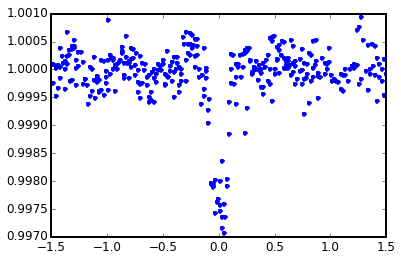

In [7]:
t, f, f_err = np.loadtxt('k2_test.csv', delimiter=',', unpack=True)
m = np.absolute(t) < 1.5
t=t[m]; f=f[m]; f_err=f_err[m]
plt.plot(t, f, '.');

Hmm, some disturbing residuals here.  But moving on... let's load up the stellar model fit and take a look at the stellar density constraint.

In [8]:
from isochrones import StarModel
mod = StarModel.load_hdf('k2_starmodel.h5')

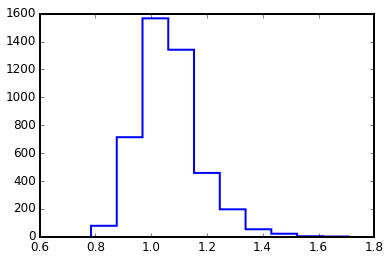

In [15]:
rhostar = mod.samples.mass / (4./3 * np.pi * mod.samples.radius**3)
plt.hist(rhostar, histtype='step', lw=2);

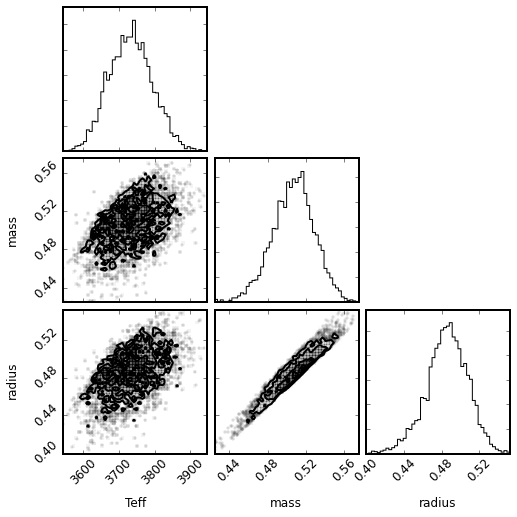

In [18]:
mod.triangle(['Teff', 'mass', 'radius']);